In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.clustering import *

# Remove scientific notation and round to 2 decimal cases
pd.set_option('display.float_format', '{:.2f}'.format)

In [215]:
df = pd.read_csv('final_data_for_bi_dwct.csv')

In [216]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8067685 entries, 0 to 8067684
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Quarter             object 
 1   POS_ID              int64  
 2   ProductPackSKU_ID   int64  
 3   Total_Value         float64
 4   Total_Units         int64  
 5   Purchased_Units     int64  
 6   ProductFamily_ID    int64  
 7   ProductCategory_ID  int64  
 8   ProductBrand_ID     int64  
 9   ProductName_ID      int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 615.5+ MB


# Clustering Perspectives - POS (Value and Preferences)
For that we will use:

POS_ID as guide (groupby)

Metric Features: Total_Value, Total_Units

Categorical Features: ProductFamily_ID, ProductName_ID, ProductBrand_ID

In [73]:
df

,Quarter,POS_ID,ProductPackSKU_ID,Total_Value,Total_Units,Purchased_Units,ProductFamily_ID,ProductCategory_ID,ProductBrand_ID,ProductName_ID
0,2016Q1,359,4835,379062.0,599,112,15,3,828,1581
1,2016Q1,410,754,228068.0,490,106,9,178,127,231
2,2016Q1,208,4835,217423.0,311,102,15,3,828,1581
3,2016Q1,355,4835,191877.0,283,101,15,3,828,1581
4,2016Q1,239,755,295200.0,675,100,9,178,127,231
...,...,...,...,...,...,...,...,...,...,...
8067680,2019Q4,311,30,19130.0,2,1,21,109,638,9
8067681,2019Q4,194,6795,1147.0,1,1,9,178,1179,2217
8067682,2019Q4,64,2471,1075.0,1,1,21,78,427,826
8067683,2019Q4,311,46,1655.0,1,1,21,39,4,18


In [218]:
# Getting the number 1 (mode) of the 3 categorical features
clus = df.groupby(['POS_ID']).agg({'Total_Value': 'sum','Total_Units':'sum',\
                                   'ProductFamily_ID': (lambda x: x.value_counts().index[0]),\
                                   'ProductBrand_ID': (lambda x: x.value_counts().index[0]),\
                                   'ProductName_ID': (lambda x: x.value_counts().index[0])})
clus

,Total_Value,Total_Units,ProductFamily_ID,ProductBrand_ID,ProductName_ID
POS_ID,,,,,
1,978670349.77,609151,21,1472,1228
2,635534919.91,390484,12,133,253
3,1048120296.56,602120,21,1472,253
4,1261300284.63,797480,21,1472,253
5,668177864.75,423022,21,1472,253
...,...,...,...,...,...
406,786755352.91,494233,21,427,253
407,1264066725.27,784910,21,427,253
408,707863405.60,456295,21,174,253


In [219]:
# ProductCategory didn´t work out because all stores had the same Top 1 most popular category: "178"

In [220]:
# Others have different behaviours
clus.ProductName_ID.value_counts()

253     370
1228     13
126      11
2646      7
1422      5
1060      3
1287      1
Name: ProductName_ID, dtype: int64

In [144]:
# Setting up using pycaret. 
# This library automatically produces preprocessing steps, checking for high cardinality,
# Missing values, and encodes the categorical data

clu_set = setup(clus, session_id=123, log_experiment=True, log_plots = True, 
             experiment_name='perspective1')

,Description,Value
0,session_id,123
1,Original Data,"(410, 5)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,3
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(410, 22)"
9,CPU Jobs,-1


In [222]:
# Testing different models from pycaret clustering library

In [146]:
kmeans = create_model('kmeans', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5445,1356.6451,0.5039,0,0,0


In [147]:
kmodes = create_model('kmodes', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.2147,9.4065,2.831,0,0,0


In [148]:
hclust = create_model('hclust', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5151,991.2058,0.565,0,0,0


In [ ]:
# after testing the best algorithms with 4 clusters, we proceed to check the elbow, distributions and silhouette

In [149]:
kmeans_results = assign_model(kmeans)
kmeans_results.head()

,Total_Value,Total_Units,ProductFamily_ID,ProductBrand_ID,ProductName_ID,Cluster
POS_ID,,,,,,
1,9.786703e+08,609151,21,1472,1228,Cluster 0
2,6.355349e+08,390484,12,133,253,Cluster 1
3,1.048120e+09,602120,21,1472,253,Cluster 0
4,1.261300e+09,797480,21,1472,253,Cluster 2
5,6.681779e+08,423022,21,1472,253,Cluster 1


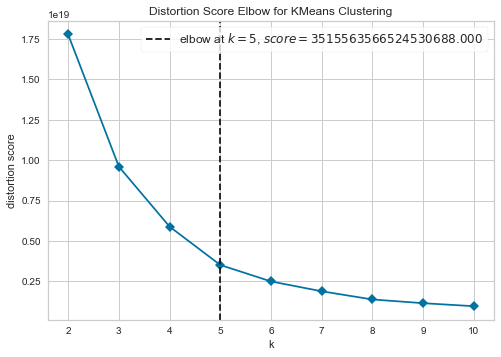

In [150]:
plot_model(kmeans, plot = 'elbow')

In [227]:
# elbow showed the best option is K=5, so we will iterate again with that number

In [151]:
# 3D graph of clusters
plot_model(kmeans, plot = 'tsne')

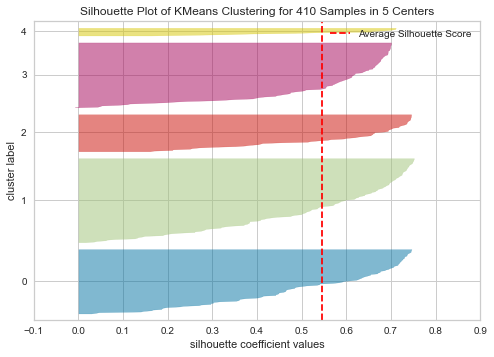

In [152]:
plot_model(kmeans, plot = 'silhouette')

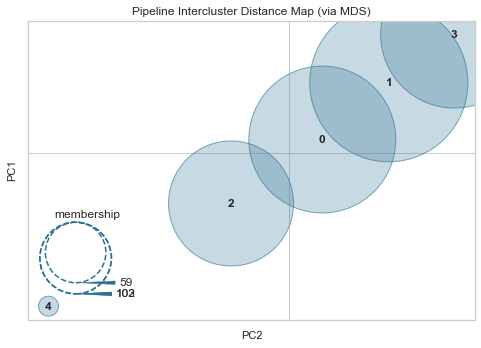

In [153]:
plot_model(kmeans, plot = 'distance')

In [154]:
# distribution
plot_model(kmeans, plot = 'distribution')

In [224]:
kmeans_results

,Total_Value,Total_Units,ProductFamily_ID,ProductBrand_ID,ProductName_ID,Cluster
POS_ID,,,,,,
1,978670349.77,609151,21,1472,1228,Cluster 0
2,635534919.91,390484,12,133,253,Cluster 1
3,1048120296.56,602120,21,1472,253,Cluster 0
4,1261300284.63,797480,21,1472,253,Cluster 2
5,668177864.75,423022,21,1472,253,Cluster 1
...,...,...,...,...,...,...
406,786755352.91,494233,21,427,253,Cluster 1
407,1264066725.27,784910,21,427,253,Cluster 2
408,707863405.60,456295,21,174,253,Cluster 1


In [225]:
# Displaying results for Cluster 0 
kmeans_results[kmeans_results.Cluster=='Cluster 0']

,Total_Value,Total_Units,ProductFamily_ID,ProductBrand_ID,ProductName_ID,Cluster
POS_ID,,,,,,
1,978670349.77,609151,21,1472,1228,Cluster 0
3,1048120296.56,602120,21,1472,253,Cluster 0
11,946285681.94,590485,21,1472,253,Cluster 0
13,1041173202.98,673919,21,133,253,Cluster 0
16,1013070165.34,698716,21,133,253,Cluster 0
...,...,...,...,...,...,...
374,997378619.53,616151,21,1472,253,Cluster 0
382,1078355578.38,606877,21,1472,253,Cluster 0
390,996026276.00,594064,21,1472,253,Cluster 0


In [226]:
# See common characteristics among clusters with Mode of categorical features and Mean of metric features
results = kmeans_results.groupby('Cluster').agg({'Total_Value': 'mean','Total_Units':'mean',\
                                   'ProductFamily_ID': (lambda x: x.value_counts().index[0]),\
                                   'ProductBrand_ID': (lambda x: x.value_counts().index[0]),\
                                   'ProductName_ID': (lambda x: x.value_counts().index[0])})
results
# Here´s the mean of every cluster. And the most sold item/family/brand of each cluster (mode)

,Total_Value,Total_Units,ProductFamily_ID,ProductBrand_ID,ProductName_ID
Cluster,,,,,
Cluster 0,926312759.01,576697.31,21,133,253
Cluster 1,650379848.28,404556.80,21,133,253
Cluster 2,1258010167.01,775852.29,21,133,253
Cluster 3,404022574.45,250576.04,21,133,253
Cluster 4,1841490763.73,1118103.08,21,1472,253
